# Побудова моделі звичайної згорткової багатошарової нейронної мережі

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 172s 1us/step


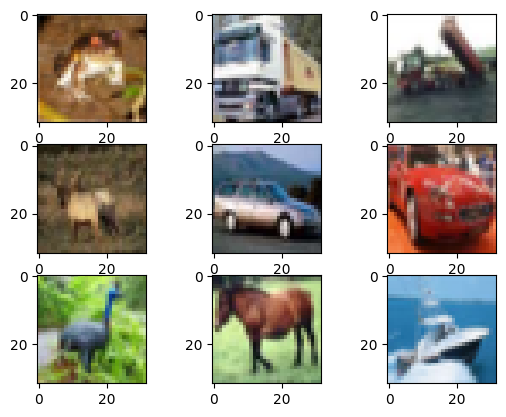

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [4]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

def infinite_generator(generator):
    while True:
        for batch in generator:
            yield batch

train_generator = infinite_generator(datagen.flow(x_train, y_train, batch_size=64))

In [5]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [6]:
batch_size = 64
epochs = 50

history = model.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=2
)

scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {scores[1] * 100:.2f}%')

Epoch 1/50
781/781 - 52s - 67ms/step - accuracy: 0.2943 - loss: 2.4012 - val_accuracy: 0.4170 - val_loss: 1.7124
Epoch 2/50
781/781 - 41s - 53ms/step - accuracy: 0.3924 - loss: 1.8531 - val_accuracy: 0.4514 - val_loss: 1.6723
Epoch 3/50
781/781 - 35s - 45ms/step - accuracy: 0.4431 - loss: 1.6361 - val_accuracy: 0.4361 - val_loss: 1.7559
Epoch 4/50
781/781 - 35s - 45ms/step - accuracy: 0.4859 - loss: 1.4872 - val_accuracy: 0.4914 - val_loss: 1.5385
Epoch 5/50
781/781 - 36s - 47ms/step - accuracy: 0.5219 - loss: 1.3652 - val_accuracy: 0.4919 - val_loss: 1.6609
Epoch 6/50
781/781 - 33s - 43ms/step - accuracy: 0.5518 - loss: 1.2697 - val_accuracy: 0.5572 - val_loss: 1.3495
Epoch 7/50
781/781 - 37s - 47ms/step - accuracy: 0.5783 - loss: 1.1913 - val_accuracy: 0.5466 - val_loss: 1.3986
Epoch 8/50
781/781 - 35s - 45ms/step - accuracy: 0.6004 - loss: 1.1233 - val_accuracy: 0.5874 - val_loss: 1.2461
Epoch 9/50
781/781 - 34s - 44ms/step - accuracy: 0.6217 - loss: 1.0703 - val_accuracy: 0.5997 - 

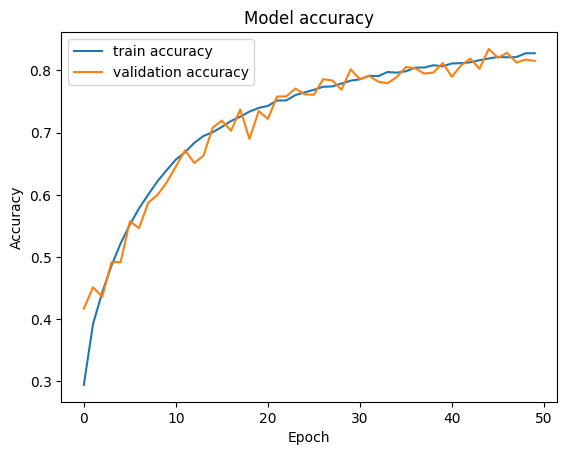

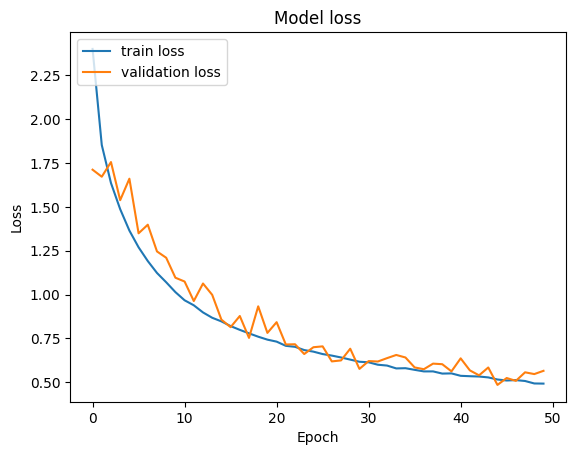

In [7]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [8]:
model_test_acc=model.evaluate(x_test,y_test, batch_size=128)
model_test_acc

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8147 - loss: 0.5599


[0.5650959014892578, 0.8154000043869019]

In [9]:
model_train_acc=model.evaluate(x_train,y_train, batch_size=128)
model_train_acc

391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8555 - loss: 0.4213


[0.42787250876426697, 0.8533400297164917]

# Збереження моделі

In [10]:
model.save("Sequential_cifar10_model_0.2.keras")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/Sequential_cifar10_model_0.2.keras /content/drive/MyDrive/

Mounted at /content/drive


# Тестування моделі

In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

model_path = '/content/drive/MyDrive/Sequential_cifar10_model_0.2.keras'
model = tf.keras.models.load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: horse


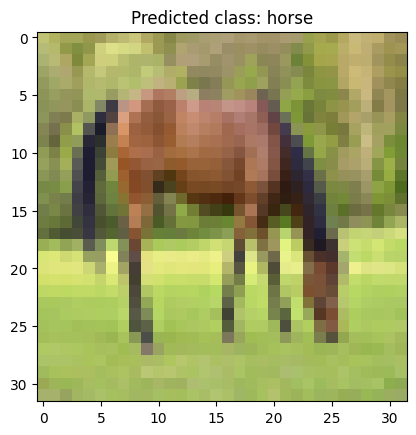

In [38]:
img_path = '/content/drive/MyDrive/horse.jpg'

img = Image.open(img_path)

img = img.resize((32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array.astype('float32') / 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

print(f"Predicted class: {class_names[predicted_class]}")
plt.imshow(img)
plt.title(f"Predicted class: {class_names[predicted_class]}")
plt.show()